In [11]:
import pandas as pd
obj = pd.Series([3,4,5,6])  
#class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
obj

0    3
1    4
2    5
3    6
dtype: int64

In [12]:
obj.index
# see that the default index of series is a rangeindex

RangeIndex(start=0, stop=4, step=1)

In [19]:
obj2 = pd.Series([80,90,70,60],['chinese','math','english','physics'])  
print(obj2['math'])  # output value
print()
print(obj2[['math','physics']]) #output a serie (note: not numpy array)

90

math       90
physics    60
dtype: int64


In [20]:
#Pandas 的底層是numpy
obj2.values
# note that the output is a ndarray. 
# Series is then basically ndarray but with index.

array([80, 90, 70, 60], dtype=int64)

In [21]:
obj2.index
# index become the customised index

Index(['chinese', 'math', 'english', 'physics'], dtype='object')

In [28]:
#because background is numpy, so operations for ndarray all works for series:
ndarrayobj2 = obj2.values
print(obj2)
print()
print(ndarrayobj2 * 2)
print()
print(obj2 *2)

chinese    80
math       90
english    70
physics    60
dtype: int64

[160 180 140 120]

chinese    160
math       180
english    140
physics    120
dtype: int64


In [27]:
#numpy/series filtering:
print(obj2)
print()
boolValue = obj2 > 4 
print(boolValue)
print()
print(obj2[boolValue])
obj2[obj2>70]

# since series is able to do everything that ndarray does, but with the benefit of index
# we actually use series more than ndarray!

chinese    80
math       90
english    70
physics    60
dtype: int64

chinese    True
math       True
english    True
physics    True
dtype: bool

chinese    80
math       90
english    70
physics    60
dtype: int64


chinese    80
math       90
dtype: int64

In [30]:
import numpy as np
print(np.sum(ndarrayobj2)) #  "function" of numpy package

print()

print(obj2.sum()) # "method" of pandas series  ==> more convenient!

300

300


In [31]:
# use "in" test for presence of an index
'chinese' in obj2

True

In [33]:
#populate series with dict
series3 = pd.Series({'台北':35000,'桃園':12314, '台中':16000, '高雄':5000})
series3

台北    35000
桃園    12314
台中    16000
高雄     5000
dtype: int64

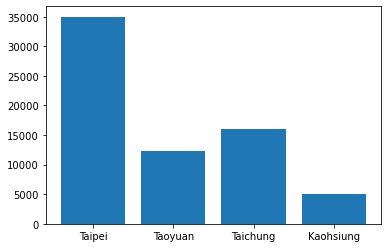

In [39]:
series4 = pd.Series({'Taipei':35000,'Taoyuan':12314, 'Taichung':16000, 'Kaohsiung':5000})
values = series4.values
index = series4.index

import matplotlib.pyplot as plt
plt.bar(index, values)
plt.show()

In [46]:
# pd.Series can be used as vlookup!
    
states = ['Taipei','Taichung','Hualien']
seriesfiltered = pd.Series(series4, index = states)
seriesfiltered
# note the output!
# index in pd.Series becomes a vlookup argument.

Taipei      35000.0
Taichung    16000.0
Hualien         NaN
dtype: float64

In [51]:
print(pd.isnull(seriesfiltered)) # function from pandas package
print(pd.notnull(seriesfiltered))

print()

print(seriesfiltered.isnull()) # method of Series object
print(seriesfiltered.notnull())

print()

print(seriesfiltered[seriesfiltered.notnull()]) # combine use notnull/isnull to filter

Taipei      False
Taichung    False
Hualien      True
dtype: bool
Taipei       True
Taichung     True
Hualien     False
dtype: bool

Taipei      False
Taichung    False
Hualien      True
dtype: bool
Taipei       True
Taichung     True
Hualien     False
dtype: bool

Taipei      35000.0
Taichung    16000.0
dtype: float64


In [57]:
# we can set the "name" attribute of Series and its index column
series3.index.name = '縣市'
series3.name = '縣市人口數'   # name of Series will become the column name when used in a dataframe
#note: no such thing as series.values.name as series.values is a numpy array

print(series3.index.name)
print(series3.name)

series3

縣市
縣市人口數


縣市
台北    35000
桃園    12314
台中    16000
高雄     5000
Name: 縣市人口數, dtype: int64

In [58]:
#Data frame is simply a set of series that has the same index
#class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

In [63]:
import csv
import numpy as np
import pandas as pd

# using with open, after reading will close file automatically
with open('D:\Desktop\歷年補助各縣市入營輸送經費預算統計表-OPENDATA甄選組甄選科3.csv', encoding='utf8') as file:
    rows = csv.reader(file)
    for row in rows:
        print(row)

['\ufeffCounties', '2001_year', '2002_year', '2003_year', '2004_year', '2005_year', '2006_year', '2007_year', '2008_year', '2009_year', '2010_year', '2011_year', '2012_year', '2013_year', '2014_year', '2015_year', '2016_year', '2017_year', '2018_year', '2019_year', '2020_year', '2021_year']
['縣市', '90年_預算數', '91年_預算數', '92年_預算數', '93年_預算數', '94年_預算數', '95年_預算數', '96年_預算數', '97年_預算數', '98年_預算數', '99年_預算數', '100年_預算數', '101年_預算數', '102年_預算數', '103年_預算數', '104年_預算數', '105年_預算數', '106年_預算數', '107年_預算數', '108年_預算數', '109年_預算數', '110年_預算數']
['新北市_原臺北縣', '961', '958', '983', '1101', '1101', '1349', '1393', '1793', '1393', '1470', '1545', '1545', '2772', '2098', '1889', '1891', '2283', '1279', '991', '841', '720']
['臺北市', '1067', '813', '929', '701', '712', '784', '810', '855', '855', '995', '1000', '860', '1357', '1192', '1222', '1359', '1481', '747', '673', '554', '590']
['桃園市_原桃園縣', '500', '473', '392', '499', '500', '613', '633', '633', '633', '633', '633', '720', '924', '823', '696', '106

In [76]:
#用csv 建立 dictionary --> convert to series
members= {}
with open('D:\Desktop\歷年補助各縣市入營輸送經費預算統計表-OPENDATA甄選組甄選科3.csv', encoding='utf8') as file:
    next(file) #skip to next row
    next(file) #skip to next row!
    rows = csv.reader(file)
    for row in rows:
        if row[0] != '合計':
            members[row[0]] = float(row[1])   #set members[new_key] = new_value
members_series = pd.Series(members)
print(members_series)
print(members_series.sum())

新北市_原臺北縣             961.000
臺北市                 1067.000
桃園市_原桃園縣             500.000
臺中市_99年_預算數後縣市合併     127.000
臺中縣_98年_預算數前         263.000
臺南市_99年_預算數後縣市合併     361.000
臺南縣_98年_預算數前         403.000
高雄市_99年_預算數後縣市合併     528.000
高雄縣_98年_預算數前         216.000
宜蘭縣                  201.000
新竹縣                  128.000
苗栗縣                  528.000
彰化縣                  172.000
南投縣                  112.000
雲林縣                  241.000
嘉義縣                   85.000
屏東縣                  348.000
臺東縣                  169.000
花蓮縣                  197.396
澎湖縣                  129.000
基隆市                  105.000
新竹市                  124.000
嘉義市                   97.000
金門縣                   78.000
連江縣                   13.000
dtype: float64
7153.396


In [81]:
# create dictionary using comprehension

with open('D:\Desktop\歷年補助各縣市入營輸送經費預算統計表-OPENDATA甄選組甄選科3.csv', encoding='utf8') as file:
    next(file) #skip to next row
    next(file) #skip to next row!
    rows = csv.reader(file)
    members = {row[0]:float(row[1]) for row in rows if row[0] != '合計'}
members

{'新北市_原臺北縣': 961.0,
 '臺北市': 1067.0,
 '桃園市_原桃園縣': 500.0,
 '臺中市_99年_預算數後縣市合併': 127.0,
 '臺中縣_98年_預算數前': 263.0,
 '臺南市_99年_預算數後縣市合併': 361.0,
 '臺南縣_98年_預算數前': 403.0,
 '高雄市_99年_預算數後縣市合併': 528.0,
 '高雄縣_98年_預算數前': 216.0,
 '宜蘭縣': 201.0,
 '新竹縣': 128.0,
 '苗栗縣': 528.0,
 '彰化縣': 172.0,
 '南投縣': 112.0,
 '雲林縣': 241.0,
 '嘉義縣': 85.0,
 '屏東縣': 348.0,
 '臺東縣': 169.0,
 '花蓮縣': 197.396,
 '澎湖縣': 129.0,
 '基隆市': 105.0,
 '新竹市': 124.0,
 '嘉義市': 97.0,
 '金門縣': 78.0,
 '連江縣': 13.0}